# K-Means Clustering - Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# Create 5 blobs of 2,000 random data
random_state = 42
n_samples = 2000
X, y = make_blobs(n_samples=n_samples, 
                  random_state=random_state, 
                  centers=5)

### Plot the random blob data

Text(0.5, 1.0, 'Pre-Cluster Assignment Data Plot')

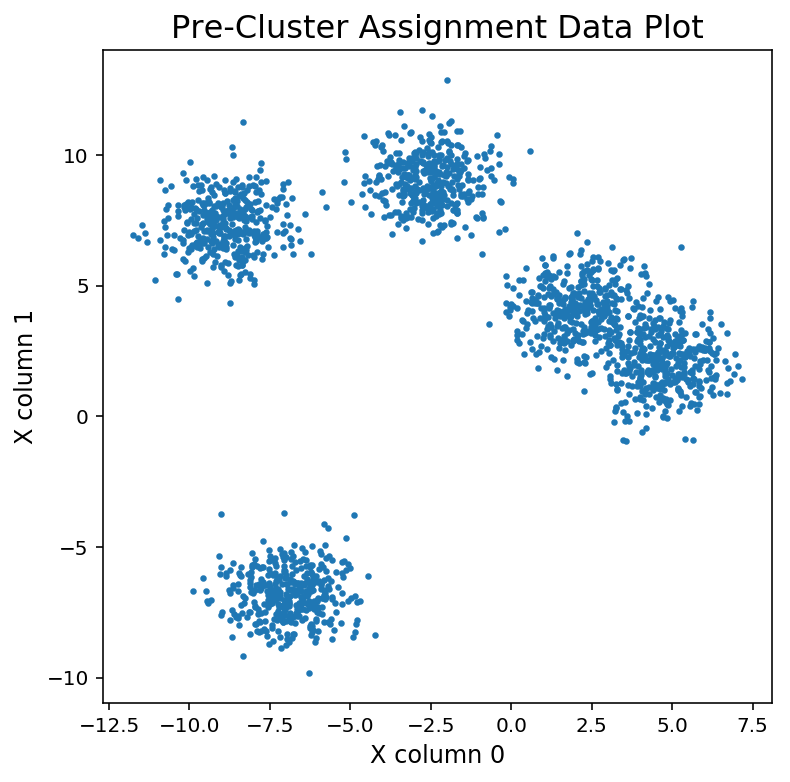

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel("X column 0", fontsize=12)
plt.ylabel("X column 1", fontsize=12)
plt.title("Pre-Cluster Assignment Data Plot", fontsize=16)

## Plot the data and color code based on the number of clusters changing

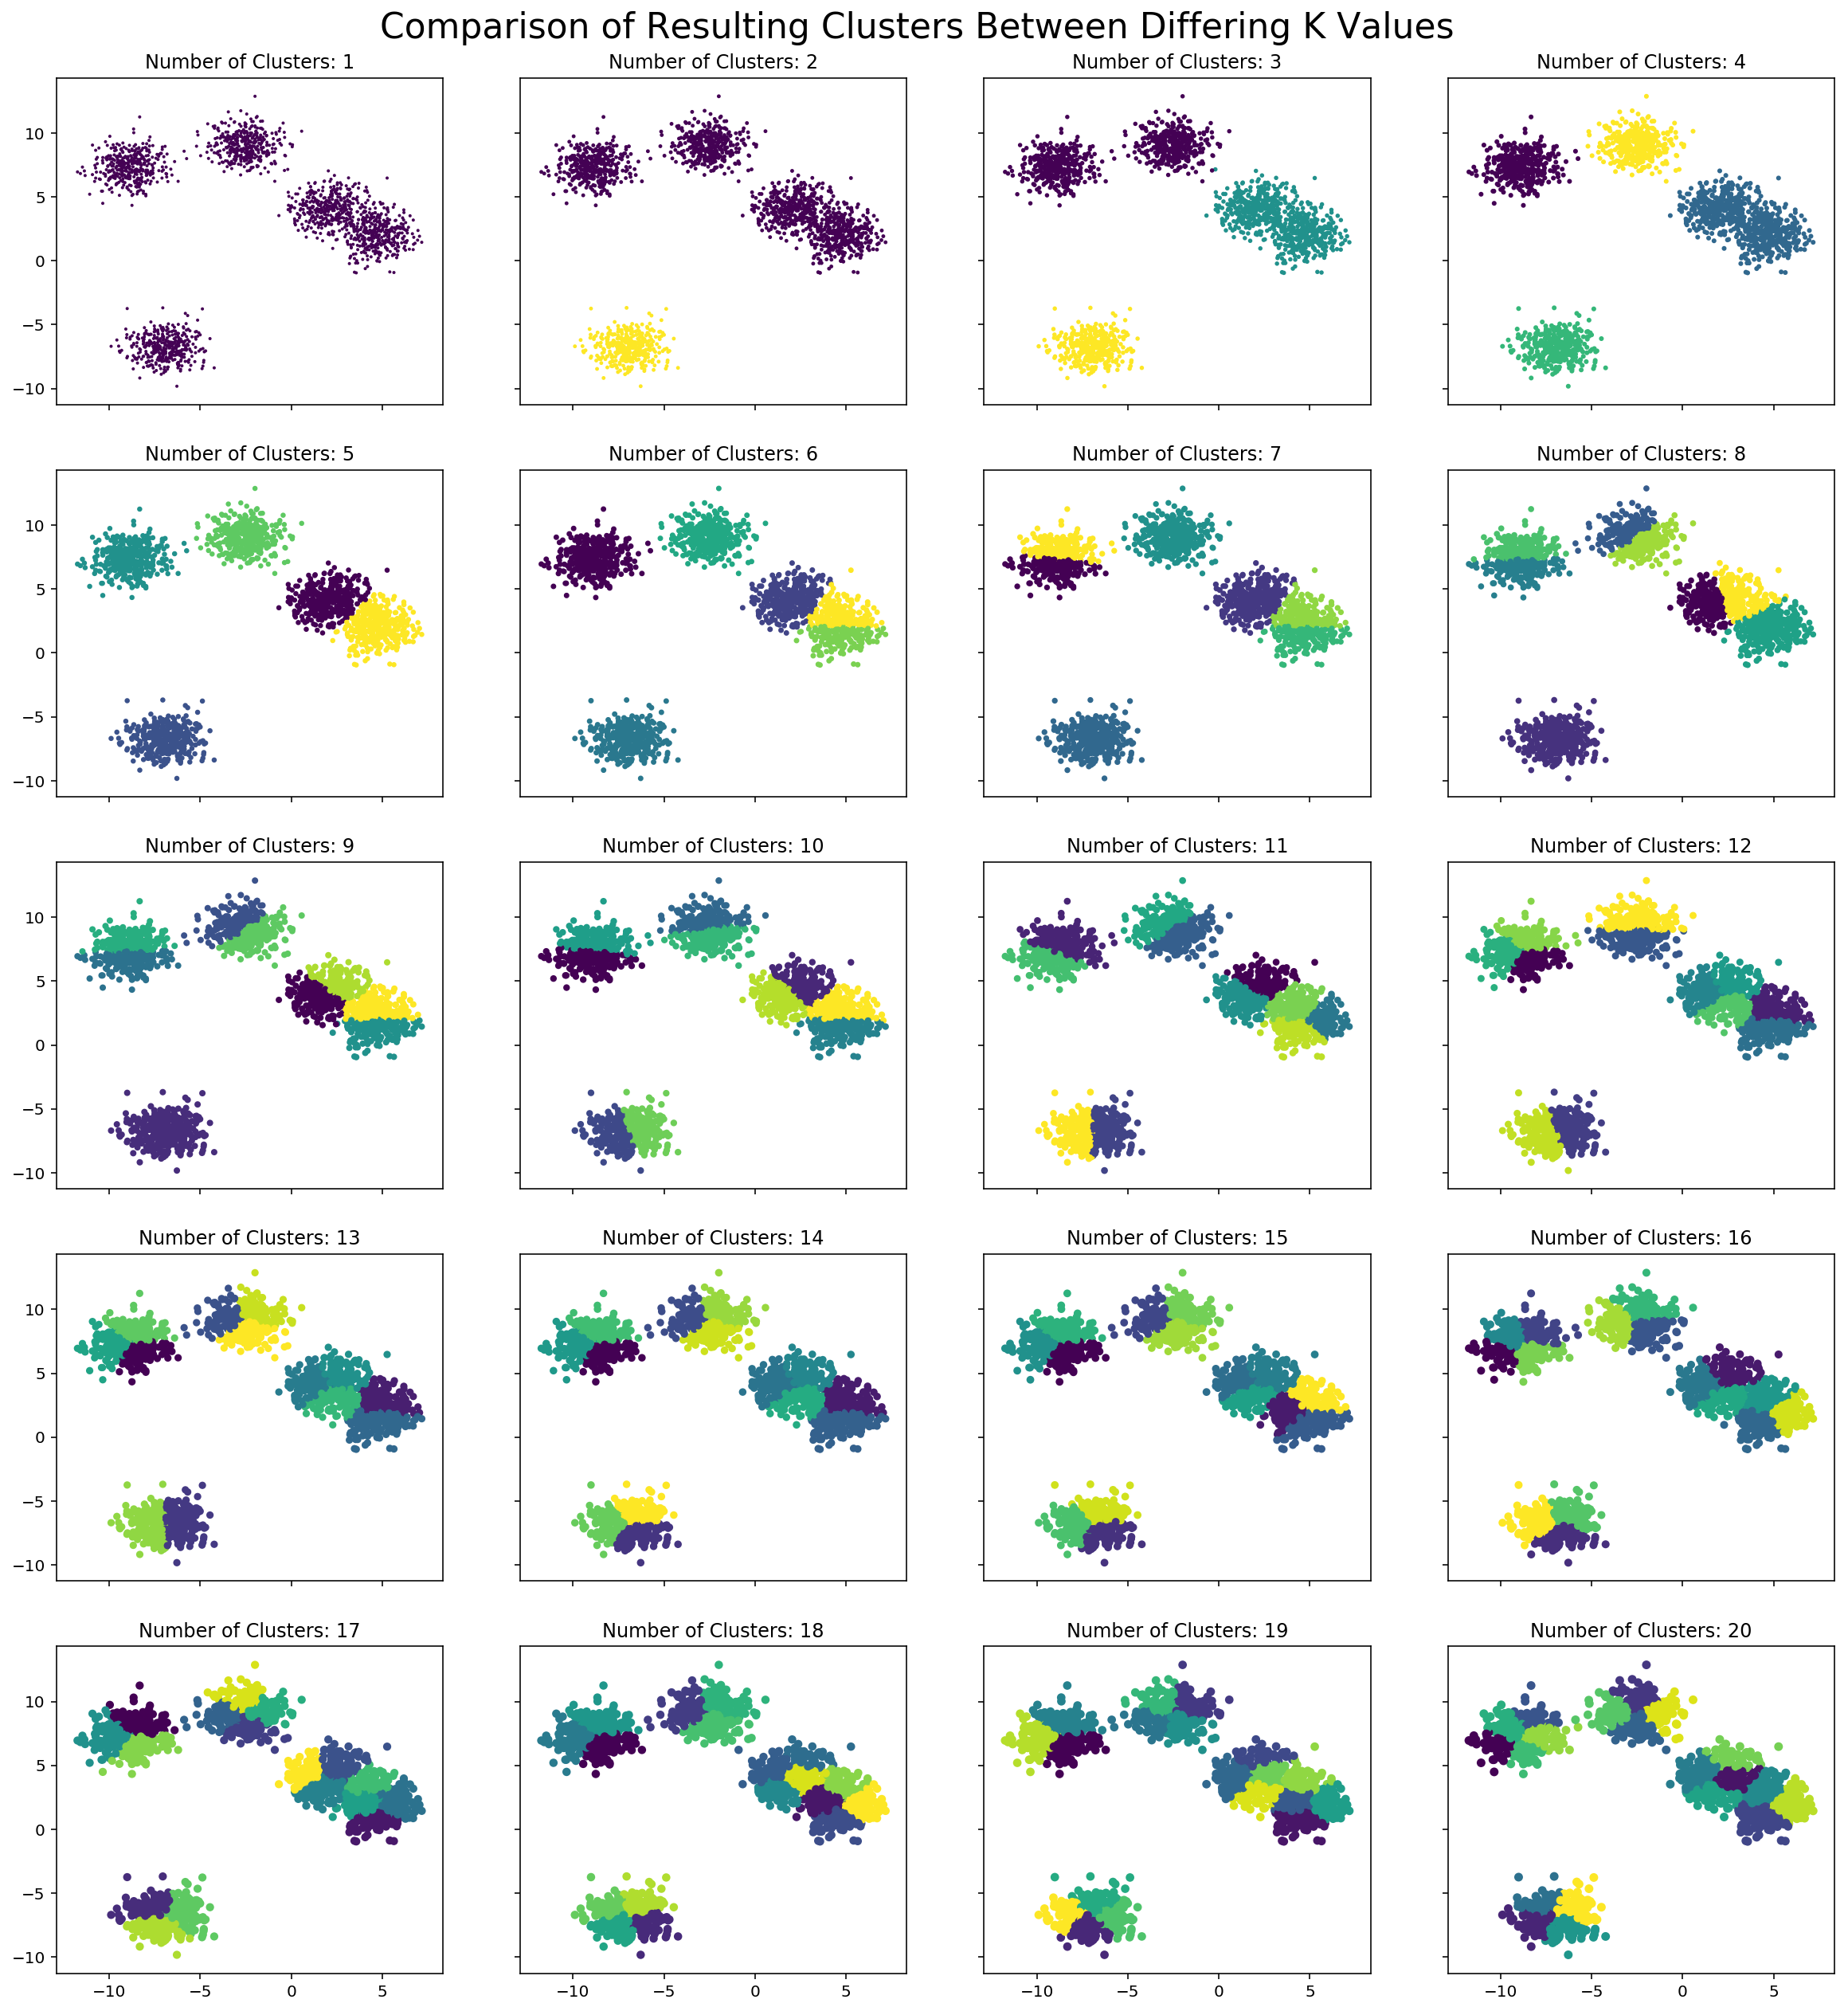

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("Comparison of Resulting Clusters Between Differing K Values", fontsize=22)
fig.subplots_adjust(top=0.951)
for i, ax in enumerate(axes.flatten()):
    i+=1
    y_pred = KMeans(n_clusters=i, random_state=random_state).fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=i) # plot resulting scatter plot
    ax.title.set_text(f"Number of Clusters: {i}")

## Comparison of K Value Determination Methods

In [6]:
from sklearn.metrics import silhouette_score
# Calculating the inertia and silhouette_score¶
inertia = []
sil = []# changing the number of clusters 

for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=random_state)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouette Score Curve')

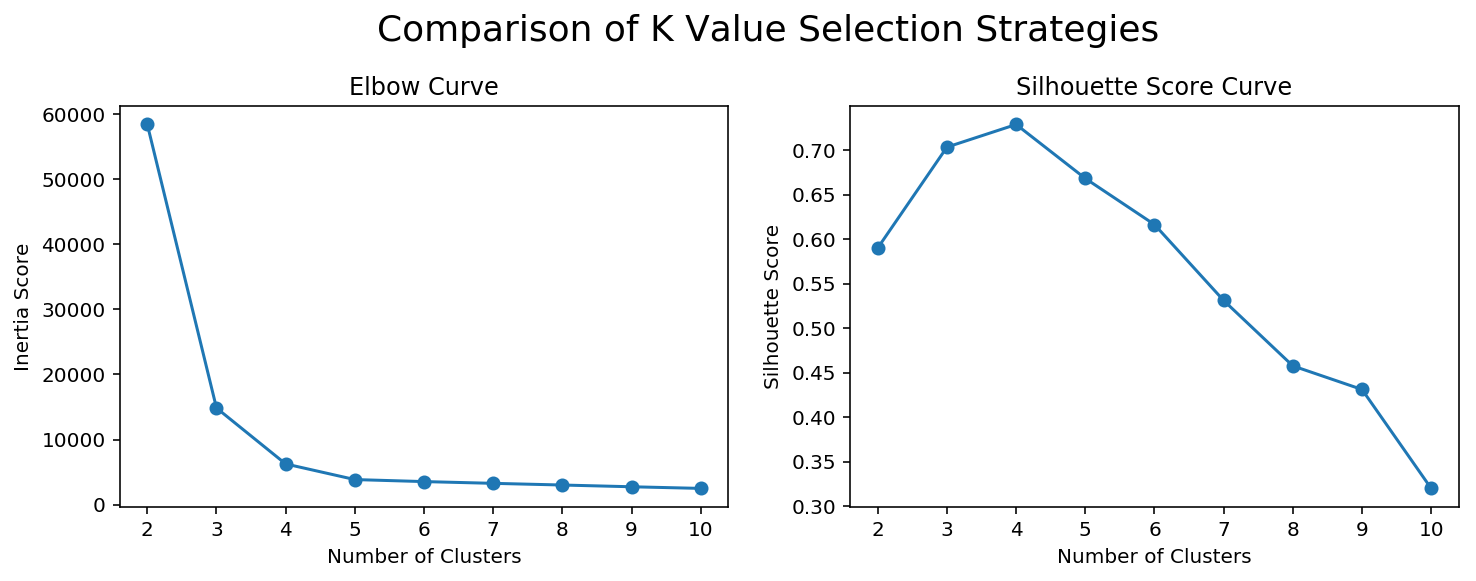

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Comparison of K Value Selection Strategies", fontsize=18)
fig.subplots_adjust(top=0.82)
# Plotting Elbow Curve (Inertia)
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner, marker="o")
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("Inertia Score")
ax[0].set_title("Elbow Curve") 
# Plotting Silhouette Curve
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil, marker="o")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score Curve")